In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
with open('../tracker_stubs/ball_tracker.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [8]:
ball_positions = [x.get(1,[]) for x in ball_positions]
df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

In [10]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'] // 2)
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()

In [9]:
df_ball_positions

,x1,y1,x2,y2
0,892.784363,614.644958,914.344666,637.460266
1,892.784363,614.644958,914.344666,637.460266
2,876.839264,630.872406,897.308624,653.694305
3,860.894165,647.099854,880.272583,669.928345
4,847.388733,659.924357,866.631165,681.952494
...,...,...,...,...
209,1185.072144,247.875069,1199.449524,263.114662
210,1184.253662,232.744858,1196.310791,245.382889
211,1183.514771,227.022400,1196.428833,241.348755
212,1180.171997,213.794815,1195.155029,229.101517


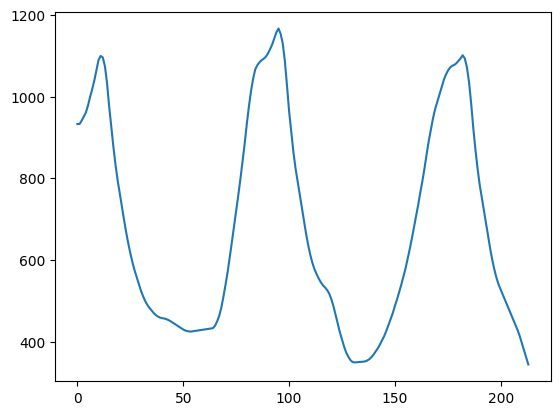

In [11]:
plt.plot(df_ball_positions['mid_y_rolling_mean'])

In [12]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

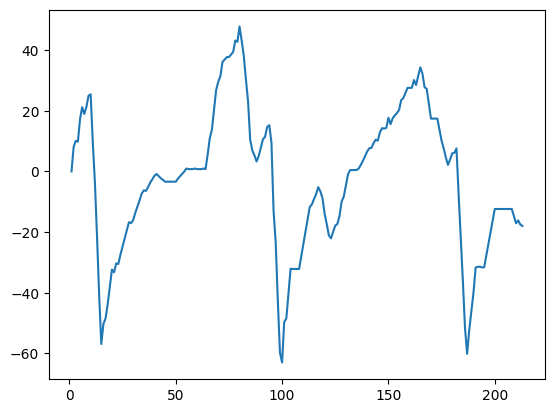

In [13]:
plt.plot(df_ball_positions['delta_y'])


In [14]:
df_ball_positions['ball_hit']=0

In [21]:
minimum_change_frames_for_hit = 25
for i in range(1,len(df_ball_positions)- int(minimum_change_frames_for_hit*1.2) ):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[i+1] <0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[i+1] >0

    if negative_position_change or positive_position_change:
        change_count = 0 
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit*1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[change_frame] <0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[change_frame] >0

            if negative_position_change and negative_position_change_following_frame:
                change_count+=1
            elif positive_position_change and positive_position_change_following_frame:
                change_count+=1
    
        if change_count>minimum_change_frames_for_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1

frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()

C:\Users\tech\AppData\Local\Temp\ipykernel_2796\3752280353.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\tech\AppData\Local\Temp\ipykernel_2796\3752280353.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\tech\AppData\Local\Temp\ipykernel_2796\3752280353.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['

In [22]:
df_ball_positions[df_ball_positions['ball_hit']==1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,777.455261,717.795776,798.082092,739.310303,1086.795776,1099.300793,9.644482,1
54,921.631627,279.343563,935.969884,295.668396,426.343563,425.024867,-0.030131,1
95,616.506104,773.503601,640.089722,800.984436,1173.503601,1166.483891,9.452702,1
131,717.334961,229.220352,730.326996,242.323929,350.220352,349.305946,-0.944583,1
182,1294.103394,738.646179,1313.958618,759.815369,1117.646179,1100.892224,7.592053,1
